In [1]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt

import matplotlib
import numpy as np

In [2]:
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util
from tf_unet import image_util

In [3]:
nx = 640
ny = 360

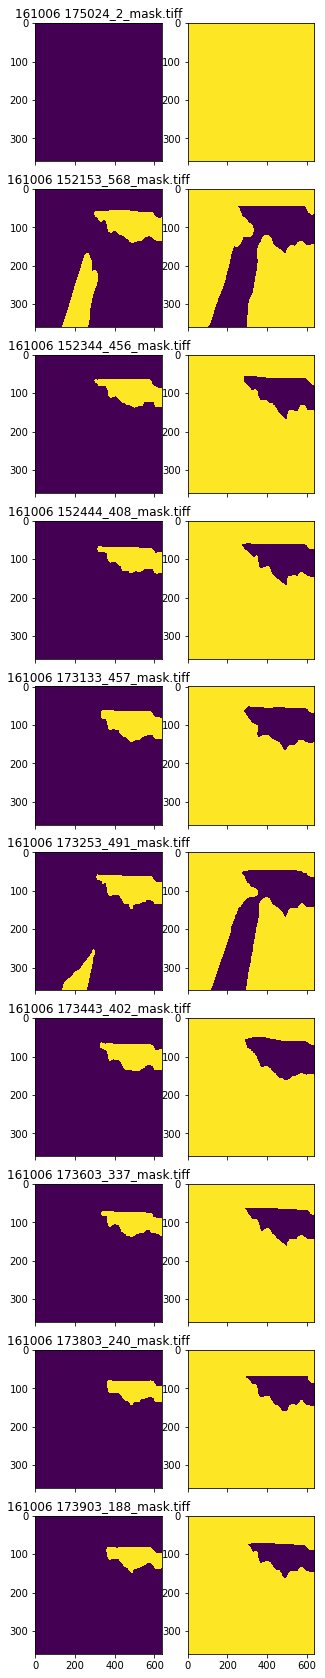

In [4]:
import glob
import os
labels = glob.glob('training_data/*.tiff')
fig, ax = plt.subplots(10,2, sharex=True, figsize=(5,30))


for i in range(30,41):    
    
    
    
    ax[i%10,0].imshow(matplotlib.image.imread(labels[i])[...,1], aspect="auto", vmin=0, vmax=1)
    ax[i%10,1].imshow(matplotlib.image.imread(labels[i])[...,2], aspect="auto", vmin=0, vmax=1)
    
    ax[i%10,0].set_title(os.path.basename(labels[i]))
    

In [4]:
generator = image_util.ImageDataProvider(labels_path='training_data', images_path='F:/MOY_PhD_DATA_LOCAL/2017_watsen/data/frames', randomize=True, mask_suffix='_mask.tiff', label_validity=5)


training_data\*_mask.tiff
Number label files found: 38
Number of files used: 156


In [5]:
x_test, y_test, names = generator(10)

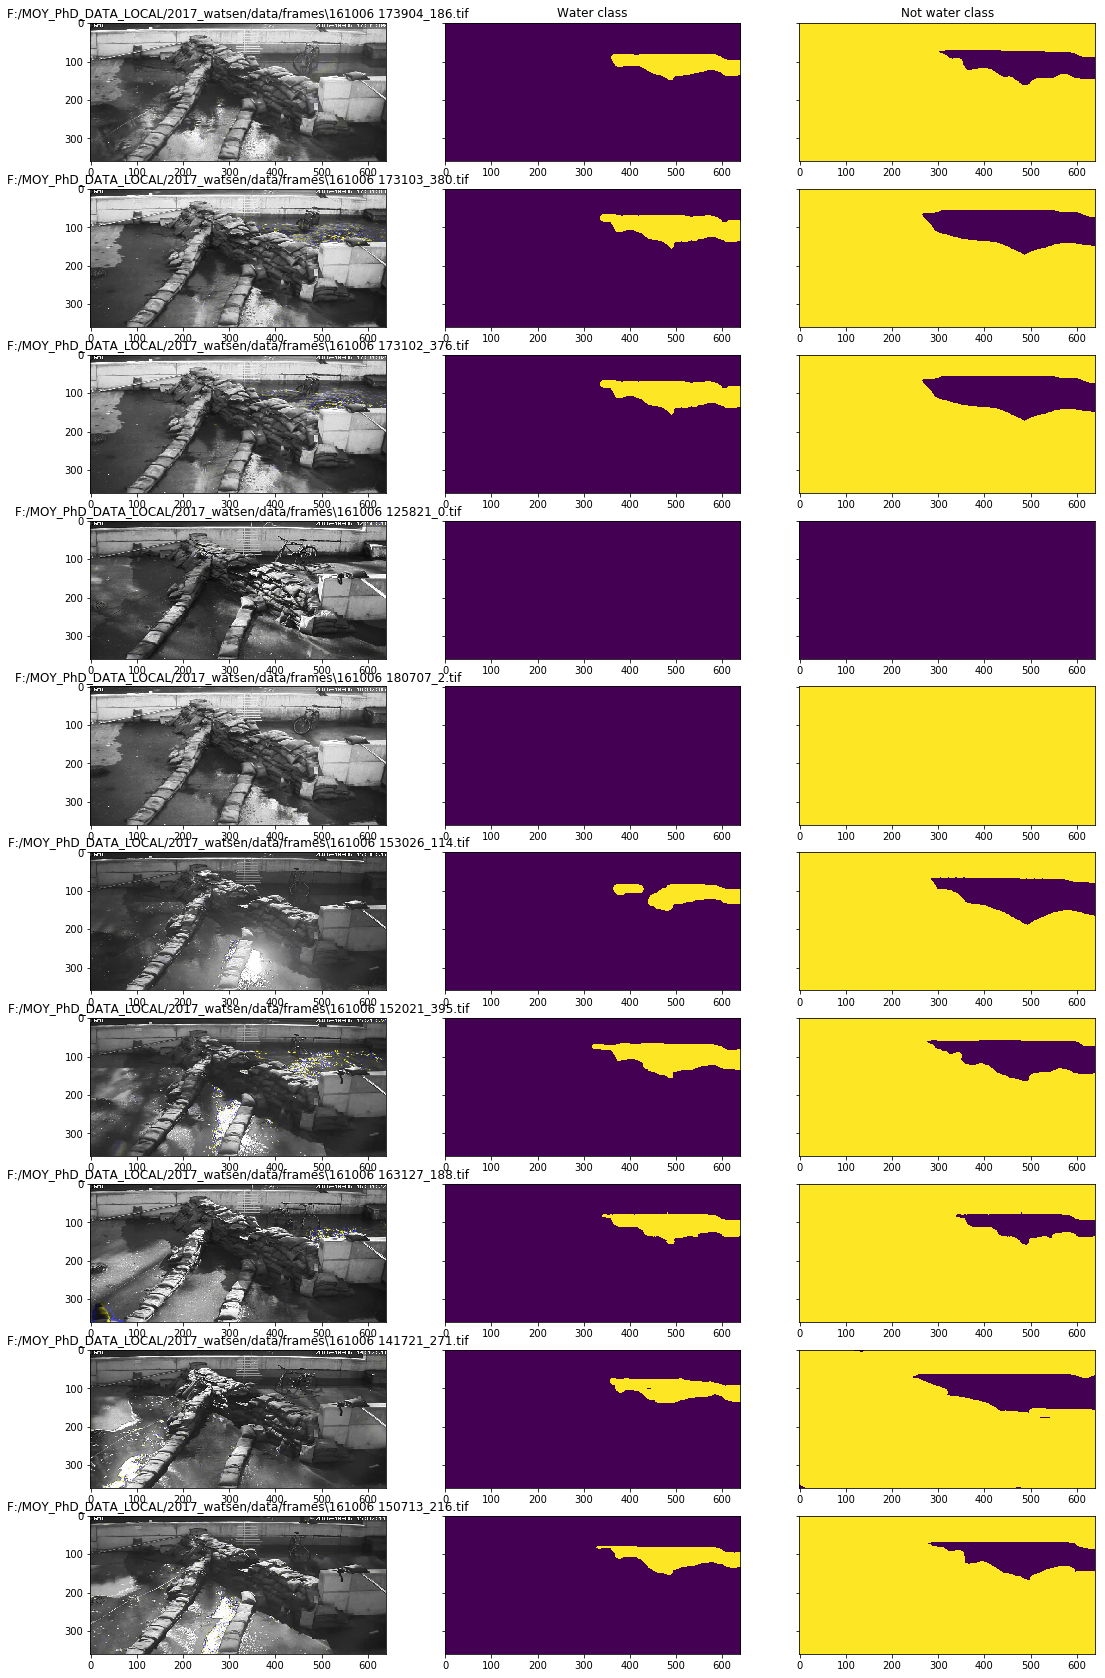

In [6]:
fig, ax = plt.subplots(10,3, sharey=True, figsize=(18,30))
ax[0,1].set_title('Water class')
ax[0,2].set_title('Not water class')
for i in range(0,10):
    ax[i,0].set_title(names[i])
    ax[i,0].imshow(x_test[i,...], aspect="auto")
    ax[i,1].imshow(y_test[i,...,0], aspect="auto")
    ax[i,2].imshow(y_test[i,...,1], aspect="auto")

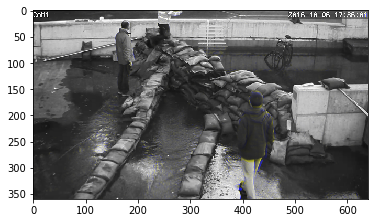

In [8]:
plt.imshow(x_test[0,...])

In [7]:
net = unet.Unet(channels=3, n_class=2, layers=5, features_root=16, cost_kwargs=dict(class_weights=[1,2]))

2017-10-02 10:32:38,141 Layers 5, features 16, filter size 3x3, pool size: 2x2


In [82]:
trainer = unet.Trainer(net, optimizer="adam")

In [83]:
path = trainer.train(generator, "./unet_trained", training_iters=100, epochs=40, display_step=25, restore=False, write_graph=True)

2017-09-29 15:12:36,679 Removing 'Q:\Abteilungsprojekte\eng\SWWData\Matthew\Workspace\watsen_unet\demo\water_level\prediction'
2017-09-29 15:12:36,697 Removing 'Q:\Abteilungsprojekte\eng\SWWData\Matthew\Workspace\watsen_unet\demo\water_level\unet_trained'
2017-09-29 15:12:36,727 Allocating 'Q:\Abteilungsprojekte\eng\SWWData\Matthew\Workspace\watsen_unet\demo\water_level\prediction'
2017-09-29 15:12:39,996 Verification error= 9.5%, loss= 1.2286
2017-09-29 15:12:44,753 Start optimization
2017-09-29 15:12:45,326 Iter 0, Minibatch Loss= 1.1480, Training Accuracy= 0.9317, Minibatch error= 10.0%
2017-09-29 15:12:49,871 Iter 25, Minibatch Loss= 0.4200, Training Accuracy= 0.9149, Minibatch error= 13.3%
2017-09-29 15:12:54,416 Iter 50, Minibatch Loss= 0.3677, Training Accuracy= 0.9166, Minibatch error= 13.9%
2017-09-29 15:12:58,956 Iter 75, Minibatch Loss= 0.1407, Training Accuracy= 1.0000, Minibatch error= 0.0%
2017-09-29 15:13:03,158 Epoch 0, Average loss: 0.4631, learning rate: 0.0010
2017-0

2017-09-29 15:21:23,765 Iter 1375, Minibatch Loss= 0.3651, Training Accuracy= 0.9193, Minibatch error= 11.2%
2017-09-29 15:21:33,341 Epoch 13, Average loss: 0.3253, learning rate: 0.0010
2017-09-29 15:21:33,438 Verification error= 9.5%, loss= 0.2739
2017-09-29 15:21:45,958 Iter 1400, Minibatch Loss= 0.2755, Training Accuracy= 0.9299, Minibatch error= 14.5%
2017-09-29 15:21:56,513 Iter 1425, Minibatch Loss= 0.4570, Training Accuracy= 0.7915, Minibatch error= 36.8%
2017-09-29 15:22:07,071 Iter 1450, Minibatch Loss= 0.3545, Training Accuracy= 0.9166, Minibatch error= 13.9%
2017-09-29 15:22:17,628 Iter 1475, Minibatch Loss= 0.3595, Training Accuracy= 0.9260, Minibatch error= 10.9%
2017-09-29 15:22:27,869 Epoch 14, Average loss: 0.3563, learning rate: 0.0010
2017-09-29 15:22:27,965 Verification error= 9.5%, loss= 0.3154
2017-09-29 15:22:41,027 Iter 1500, Minibatch Loss= 0.2148, Training Accuracy= 1.0000, Minibatch error= 0.0%
2017-09-29 15:22:51,977 Iter 1525, Minibatch Loss= 0.3165, Traini

2017-09-29 15:37:28,321 Verification error= 9.5%, loss= 0.2490
2017-09-29 15:37:47,038 Iter 2800, Minibatch Loss= 0.3532, Training Accuracy= 0.9234, Minibatch error= 12.0%
2017-09-29 15:38:03,077 Iter 2825, Minibatch Loss= 0.4030, Training Accuracy= 0.9155, Minibatch error= 11.4%
2017-09-29 15:38:19,423 Iter 2850, Minibatch Loss= 0.4238, Training Accuracy= 0.9304, Minibatch error= 10.6%
2017-09-29 15:38:35,758 Iter 2875, Minibatch Loss= 0.4411, Training Accuracy= 0.7725, Minibatch error= 46.8%
2017-09-29 15:38:51,224 Epoch 28, Average loss: 0.3412, learning rate: 0.0010
2017-09-29 15:38:51,324 Verification error= 9.5%, loss= 0.3687
2017-09-29 15:39:11,511 Iter 2900, Minibatch Loss= 0.4274, Training Accuracy= 0.9217, Minibatch error= 10.3%
2017-09-29 15:39:28,144 Iter 2925, Minibatch Loss= 0.3146, Training Accuracy= 0.9216, Minibatch error= 11.8%
2017-09-29 15:39:44,778 Iter 2950, Minibatch Loss= 0.2963, Training Accuracy= 0.9155, Minibatch error= 8.5%
2017-09-29 15:40:01,413 Iter 2975,

In [84]:
x_test, y_test = generator(9)

prediction = net.predict("./unet_trained/model.cpkt", x_test)

INFO:tensorflow:Restoring parameters from ./unet_trained/model.cpkt


2017-09-29 16:04:17,231 Restoring parameters from ./unet_trained/model.cpkt
2017-09-29 16:04:20,552 Model restored from file: ./unet_trained/model.cpkt


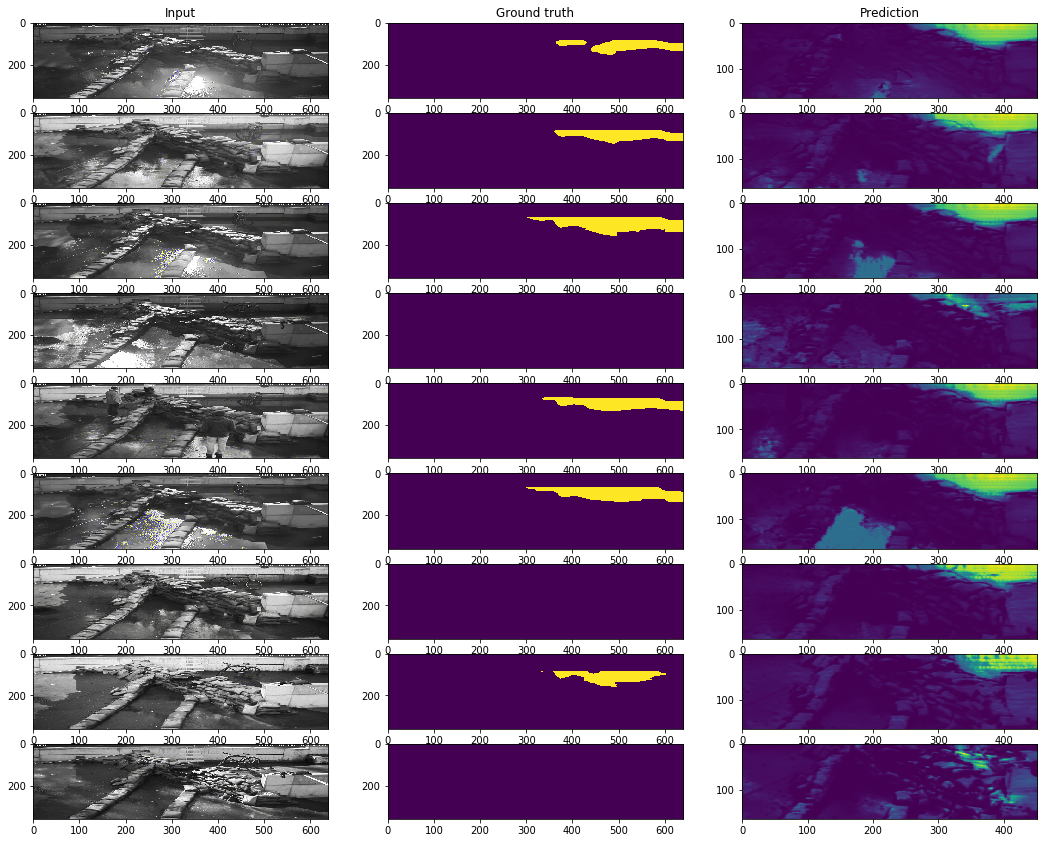

In [85]:
fig, ax = plt.subplots(9, 3, sharex=False, sharey=False, figsize=(18,27))
for i in range(0,9):
    ax[i,0].set_title('Multiframe image')
    ax[i, 0].imshow(x_test[i,...], aspect="auto")
    ax[i, 1].imshow(y_test[i,...,0], aspect="auto")
    mask = prediction[i,...,0]#>0.9
    
    
    
    ax[i, 2].imshow(mask, aspect="auto")
ax[0,0].set_title("Input")
ax[0,1].set_title("Ground truth")
ax[0,2].set_title("Prediction")

In [6]:
generator_test = image_util.ImageDataProvider(images_path='F:/MOY_PhD_DATA_LOCAL/2017_watsen/data/frames')

x_test, y_test = generator_test(10)

prediction = net.predict("./unet_trained/model.cpkt", x_test)

Number of files used: 18497


AttributeError: 'ImageDataProvider' object has no attribute 'label_files'

In [ ]:
fig, ax = plt.subplots(9, 3, sharex=False, sharey=False, figsize=(18,27))
for i in range(0,9):
    ax[i, 0].imshow(x_test[i,...], aspect="auto")
    ax[i, 1].imshow(y_test[i,...,0], aspect="auto")
    mask = prediction[i,...,0]
    ax[i, 2].imshow(mask, aspect="auto")
ax[0,0].set_title("Input")
ax[0,1].set_title("Ground truth")
ax[0,2].set_title("Prediction")

## Generation of qualitative flow plots


In [8]:
# Create Prediction
generator_test = image_util.ImageDataProvider(images_path='F:/MOY_PhD_DATA_LOCAL/2017_watsen/data/frames')
x_full, y_full, names = generator_test(1800)

prediction_full = net.predict("./unet_trained/model.cpkt", x_full)

Number of files used: 18497


AttributeError: 'ImageDataProvider' object has no attribute 'label_files'

In [ ]:
flood_index = np.sum(prediction_full>0.9, axis=(1,2))/(prediction_full.shape[1]*prediction_full.shape[0])

In [ ]:
from glob import glob as glob
import os
from datetime import datetime
data = glob('F:/MOY_PhD_DATA_LOCAL/2017_watsen/data/frames_large/*mask.tif')
data = [os.path.basename(i).split('_', 2)[0:2] for i in data]
# Parse to datetime
dates = [datetime.strptime(i[0], '%y%m%d %H%M%S') for i in data]
values = [float(i[1])/10 for i in data]

In [ ]:
import pandas as pd
dattt = pd.DataFrame({'time':dates[0:100], 'measurement':values[0:100], 'prediction':flood_index[:,0]})
dattt.to_csv("output.csv")
    

In [ ]:
fig, ax1 = plt.subplots(figsize=(16, 4))
ax1.plot(dates[0:100], flood_index[:,0], 'bo')
ax2=ax1.twinx()
ax2.plot(dates[0:100], values[0:100])
ax1.set_xlabel('time')
ax1.set_ylabel('WATSEN prediction [%]')
ax2.set_ylabel('monitored water level [cm]')
plt.show